# Instructions

This Lab is about handling dates in Panda's data frame. We will also explore frequency table and cumulative frequency chart.

We will be using a data set called climbing_statistics. Here are some details about this data set.

Date: Day of the record

Route: The route used to climb the Mt Rainier

Attempted: Number of people who attempted the climb

Succeeded: Number of people who succeeded in reaching the summit

Success Percentage: Percentage of people who succeeded in reaching the summit. 

The following link has more details. https://www.kaggle.com/codersree/mount-rainier-weather-and-climbing-data#climbing_statistics.csv. 

Read about Pandas to_datetime function here. https://pandas.pydata.org/pandasdocs/stable/reference/api/pandas.to_datetime.html

In [17]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns

### Problem 1
Upload the "climbing_statistics.csv" data in Jupyter notebook, check the data types of all the columns. Use the "to_datetime" function to change the "Date" column to datetime structure. Write a paragraph on why we did what we did and the importance of datetime structure.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
stat = pd.read_csv('climbing_statistics.csv')

In [15]:
stat.head()

,Date,Route,Attempted,Succeeded,Success Percentage
0,2015-11-27,Disappointment Cleaver,2,0,0.0
1,2015-11-21,Disappointment Cleaver,3,0,0.0
2,2015-10-15,Disappointment Cleaver,2,0,0.0
3,2015-10-13,Little Tahoma,8,0,0.0
4,2015-10-09,Disappointment Cleaver,2,0,0.0


In [4]:
stat.dtypes

Date                   object
Route                  object
Attempted               int64
Succeeded               int64
Success Percentage    float64
dtype: object

In [6]:
stat["Date"] = pd.to_datetime(stat["Date"])

In [7]:
stat.dtypes

Date                  datetime64[ns]
Route                         object
Attempted                      int64
Succeeded                      int64
Success Percentage           float64
dtype: object

Date is an integer and we cannot perform mathematical computations with object type variables since you cannot compute strings. Changing the Date variable using using the to_date function will allow us to use the date variables as if it is an integer.

### Problem 2
Use the groupby function to find out how many climbers attempted from which route. Use to_frame() and reset_index() functions to change the the output to a data frame. Is the output you just got a frequency table? Explain why or why not?

In [25]:
stat.groupby("Route")["Attempted"].sum().to_frame().reset_index()

,Route,Attempted
0,Curtis RIngraham Directge,4
1,Disappointment Cleaver,15259
2,Edmonds HW,4
3,Emmons-Winthrop,3048
4,Fuhrer's Finger,197
5,Fuhrers Finger,76
6,Gibralter Chute,13
7,Gibralter Ledges,199
8,Ingraham Direct,225
9,Kautz Cleaver,51


The output that I got is a frequency table because it shows the total amount of attempts made at each route.

### Problem 3
Create a new column called "Month" using the Date column. The month past in the Date column is the value of the "Month" column written as a word. For example, if the Date has an entry 2015-11-27, then the "Month" column will have an entry "November." Some tips are here. https://dfrieds.com/data-analysis/create-year-month-column.html

In [26]:
stat.columns

Index(['Date', 'Route', 'Attempted', 'Succeeded', 'Success Percentage'], dtype='object')

In [54]:
stat["Month"] = stat['Date'].dt.strftime('%B')
stat.head()

,Date,Route,Attempted,Succeeded,Success Percentage,Month
0,2015-11-27,Disappointment Cleaver,2,0,0.0,November
1,2015-11-21,Disappointment Cleaver,3,0,0.0,November
2,2015-10-15,Disappointment Cleaver,2,0,0.0,October
3,2015-10-13,Little Tahoma,8,0,0.0,October
4,2015-10-09,Disappointment Cleaver,2,0,0.0,October


### Problem 4
Make a frequency table of the variable "Succeeded" by month. Explain the output of why some months have large numbers, and some have small numbers. You can use one or more of the panda functions: Groupby, value_counts, and crosstab functions. https://stackoverflow.com/questions/40581312/how-to-create-a-frequency-table-in-pandas-python

In [55]:
stat.groupby("Month")["Succeeded"].sum().to_frame().reset_index()

,Month,Succeeded
0,April,25
1,August,2426
2,December,0
3,February,3
4,January,26
5,July,3914
6,June,3092
7,March,23
8,May,890
9,November,0


In [57]:
freq_df = stat.groupby("Month")["Succeeded"].sum().to_frame().reset_index()
m = {'January':1, 'February':2, 'March':3, 'April':4, 'May': 5, 'June': 6, 'July': 7, 
     'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12 }
freq_df.Month =freq_df.Month.map(m)
freq_df=freq_df.sort_values("Month")
freq_df

,Month,Succeeded
4,1,26
3,2,3
7,3,23
0,4,25
8,5,890
6,6,3092
5,7,3914
1,8,2426
11,9,652
10,10,1


Since this is a frequency table, it shows how often climbers succeeded in each month. Some months, like June, July, and August, might have larger numbers over others because of better climbing conditions and such, so the number of succeeded climbers would be higher.

### Problem 5
Plot the cumulative frequency chart for the number of succeeded climbers you found in problem 4. Here is an example. https://dfrieds.com/data-visualizations/when-use-cumulative-frequency-graph.html

<AxesSubplot:xlabel='Month'>

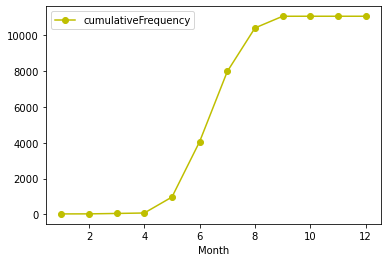

In [60]:
freq_df["cumulativeFrequency"] = freq_df['Succeeded'].cumsum()
freq_df.plot(x='Month', y='cumulativeFrequency', kind='line', style='yo-')